# 📊 Visualização dos Clusters de Filmes

Este notebook cria visualizações completas do dataset `dataset_com_cluster.csv` que contém filmes categorizados em clusters.

## Clusters Identificados:
- **ACAO_DE_PAI**: 265 filmes
- **ACAO_FANTASIA**: 228 filmes  
- **ACAO_REALISTA**: 178 filmes
- **DRAMAS**: 479 filmes
- **FAMILIA**: 169 filmes
- **ROMANCES**: 222 filmes
- **THRILLER**: 264 filmes

In [31]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
import os

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Criar pasta para salvar gráficos
os.makedirs('cluster_graphs', exist_ok=True)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [32]:
# Carregar e preparar os dados
print("Carregando dataset...")
df = pd.read_csv('dataset_com_cluster.csv')

# Remover linha de cabeçalho duplicada
df = df[df['cluster'] != 'cluster'].copy()

# Converter colunas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'Metacritic', 'imdb', 'rotten']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular métricas financeiras
df['profit'] = df['revenue'] - df['budget']
df['roi'] = (df['profit'] / df['budget']) * 100

# Converter ano
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

print(f"Dataset carregado com {len(df)} filmes")
print(f"Colunas disponíveis: {list(df.columns)}")
df.head()

Carregando dataset...
Dataset carregado com 1805 filmes
Colunas disponíveis: ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Title', 'Year', 'BoxOffice', 'Production', 'budget', 'genres', 'original_language', 'popularity', 'production_companies', 'revenue', 'runtime', 'Metacritic', 'imdb', 'rotten', 'cluster', 'profit', 'roi']


,Unnamed: 0.1,Unnamed: 0,id,Title,Year,BoxOffice,Production,budget,genres,original_language,popularity,production_companies,revenue,runtime,Metacritic,imdb,rotten,cluster,profit,roi
0,11,11,tt14827150,The Last Breath,2024,"$3,214",NaN,30000,"['Thriller', 'Horror']",en,4.5953,"['Anamorphic Films', 'Filmgate Films', 'Picaro...",273650,96,NaN,47.0,30.0,THRILLER,243650,812.166667
1,13,13,tt20315818,Ezra,2023,"$2,631,460",NaN,5000000,"['Comedy', 'Drama']",en,6.5663,"['Closer Media', 'Wayfarer Studios']",3046741,100,NaN,65.0,70.0,DRAMAS,-1953259,-39.065180
2,18,18,tt11908172,The Kill Room,2023,"$139,358",NaN,50000000,"['Thriller', 'Comedy', 'Crime']",en,6.5394,"['Yale Productions', 'Idiot Savant Pictures', ...",476375,98,58.0,55.0,59.0,ACAO_DE_PAI,-49523625,-99.047250
3,20,20,tt11687104,"Alice, Darling",2022,"$101,000",NaN,4000000,"['Thriller', 'Romance', 'Mystery', 'Drama']",en,4.2332,"['Babe Nation Films', 'Elevation Pictures', 'L...",121067,90,65.0,56.0,84.0,ROMANCES,-3878933,-96.973325
4,25,25,tt1798632,Firestarter,2022,"$9,739,250",NaN,12000000,"['Horror', 'Science Fiction', 'Sci-Fi', 'Drama']",en,6.9572,"['Blumhouse Productions', 'Weed Road Pictures'...",15000000,94,32.0,46.0,10.0,THRILLER,3000000,25.000000


## 1. 📈 Distribuição dos Clusters

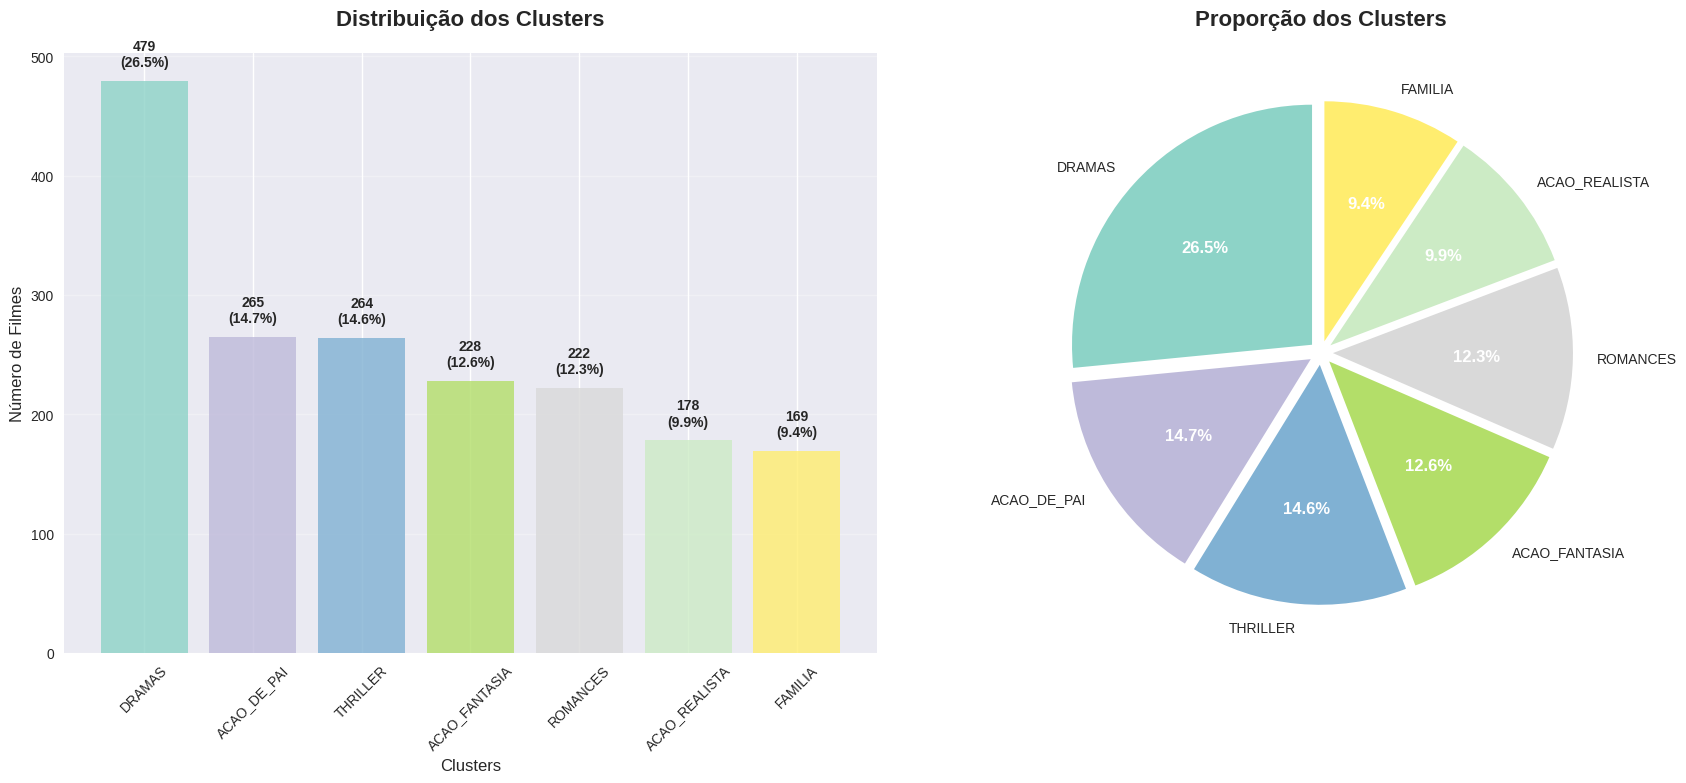


Distribuição detalhada:
DRAMAS: 479 filmes (26.5%)
ACAO_DE_PAI: 265 filmes (14.7%)
THRILLER: 264 filmes (14.6%)
ACAO_FANTASIA: 228 filmes (12.6%)
ROMANCES: 222 filmes (12.3%)
ACAO_REALISTA: 178 filmes (9.9%)
FAMILIA: 169 filmes (9.4%)


In [33]:
# Análise da distribuição dos clusters
cluster_counts = df['cluster'].value_counts()

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))
bars = ax1.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.8)
ax1.set_title('Distribuição dos Clusters', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Clusters', fontsize=12)
ax1.set_ylabel('Número de Filmes', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, count in zip(bars, cluster_counts.values):
    percentage = (count / len(df)) * 100
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

# Gráfico de pizza
wedges, texts, autotexts = ax2.pie(cluster_counts.values, labels=cluster_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90,
                                   explode=[0.05] * len(cluster_counts))
ax2.set_title('Proporção dos Clusters', fontsize=16, fontweight='bold', pad=20)

# Melhorar aparência dos textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('cluster_graphs/01_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDistribuição detalhada:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{cluster}: {count} filmes ({percentage:.1f}%)")

## 2. 💰 Performance Financeira por Cluster

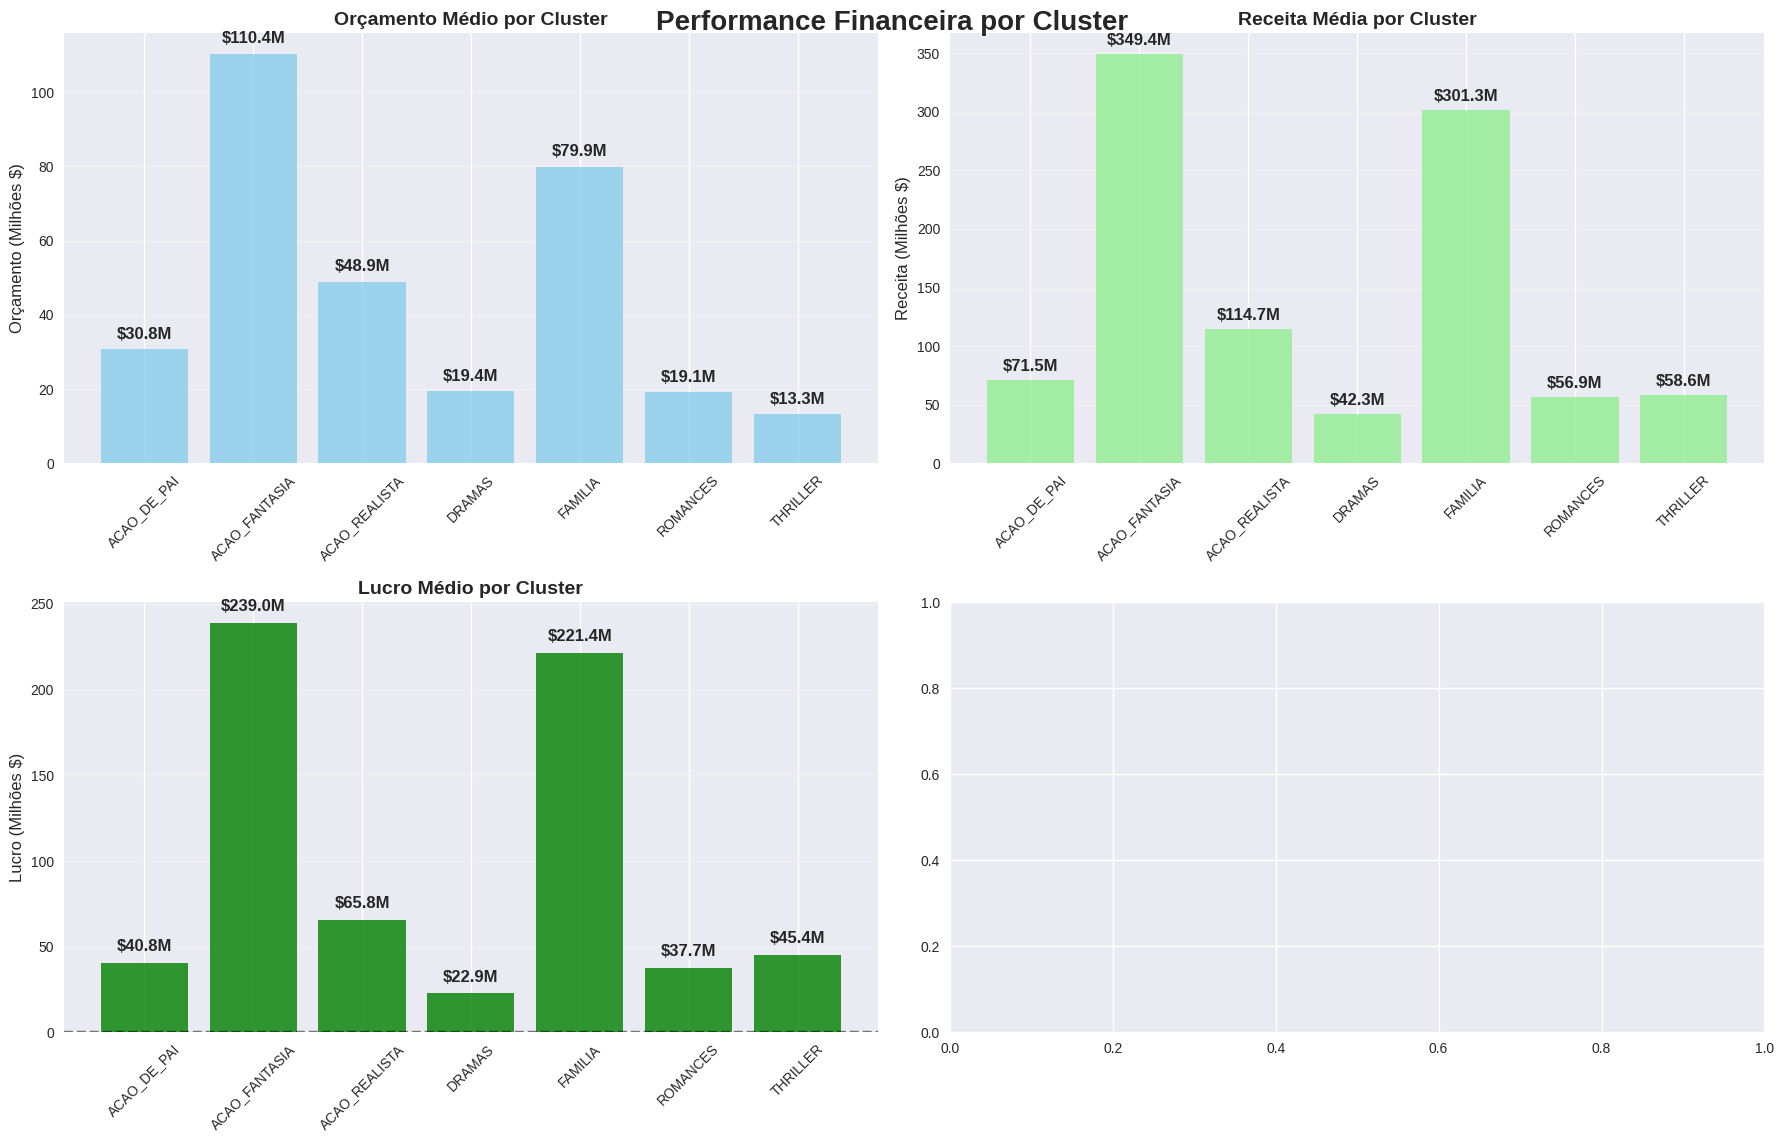


Resumo Financeiro por Cluster:
                     budget       revenue        profit        roi
cluster                                                           
ACAO_DE_PAI    3.075586e+07  7.152415e+07  4.076830e+07     151.97
ACAO_FANTASIA  1.103513e+08  3.493719e+08  2.390206e+08     255.84
ACAO_REALISTA  4.892899e+07  1.146812e+08  6.575225e+07     145.29
DRAMAS         1.938765e+07  4.232936e+07  2.294171e+07  516422.16
FAMILIA        7.991540e+07  3.012969e+08  2.213815e+08     254.77
ROMANCES       1.913576e+07  5.686950e+07  3.773375e+07     216.02
THRILLER       1.328160e+07  5.863755e+07  4.535595e+07     705.17


In [34]:
# Análise de performance financeira
financial_metrics = ['budget', 'revenue', 'profit', 'roi']

# Calcular médias por cluster
financial_summary = df.groupby('cluster')[financial_metrics].mean()

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Performance Financeira por Cluster', fontsize=20, fontweight='bold', y=0.95)

# 1. Orçamento médio por cluster
budget_means = financial_summary['budget'] / 1e6
bars1 = axes[0,0].bar(budget_means.index, budget_means.values, color='skyblue', alpha=0.8)
axes[0,0].set_title('Orçamento Médio por Cluster', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Orçamento (Milhões $)', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars1, budget_means.values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                   f'${value:.1f}M', ha='center', va='bottom', fontweight='bold')

# 2. Receita média por cluster
revenue_means = financial_summary['revenue'] / 1e6
bars2 = axes[0,1].bar(revenue_means.index, revenue_means.values, color='lightgreen', alpha=0.8)
axes[0,1].set_title('Receita Média por Cluster', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Receita (Milhões $)', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

for bar, value in zip(bars2, revenue_means.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                   f'${value:.1f}M', ha='center', va='bottom', fontweight='bold')

# 3. Lucro médio por cluster
profit_means = financial_summary['profit'] / 1e6
colors = ['red' if x < 0 else 'green' for x in profit_means.values]
bars3 = axes[1,0].bar(profit_means.index, profit_means.values, color=colors, alpha=0.8)
axes[1,0].set_title('Lucro Médio por Cluster', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Lucro (Milhões $)', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1,0].grid(axis='y', alpha=0.3)

for bar, value in zip(bars3, profit_means.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                   f'${value:.1f}M', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('cluster_graphs/02_financial_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nResumo Financeiro por Cluster:")
print(financial_summary.round(2))

## 3. ⭐ Avaliações de Qualidade por Cluster

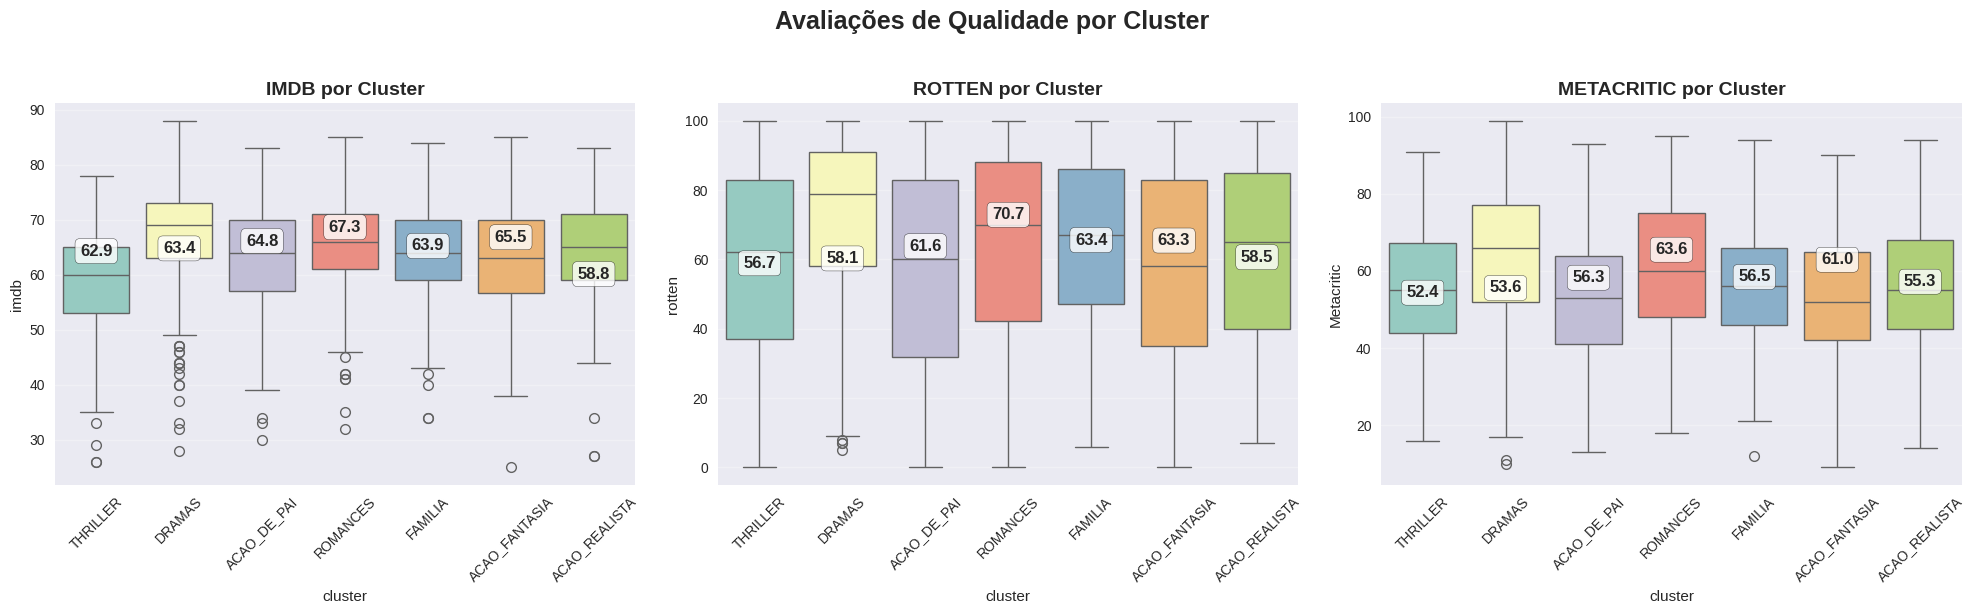

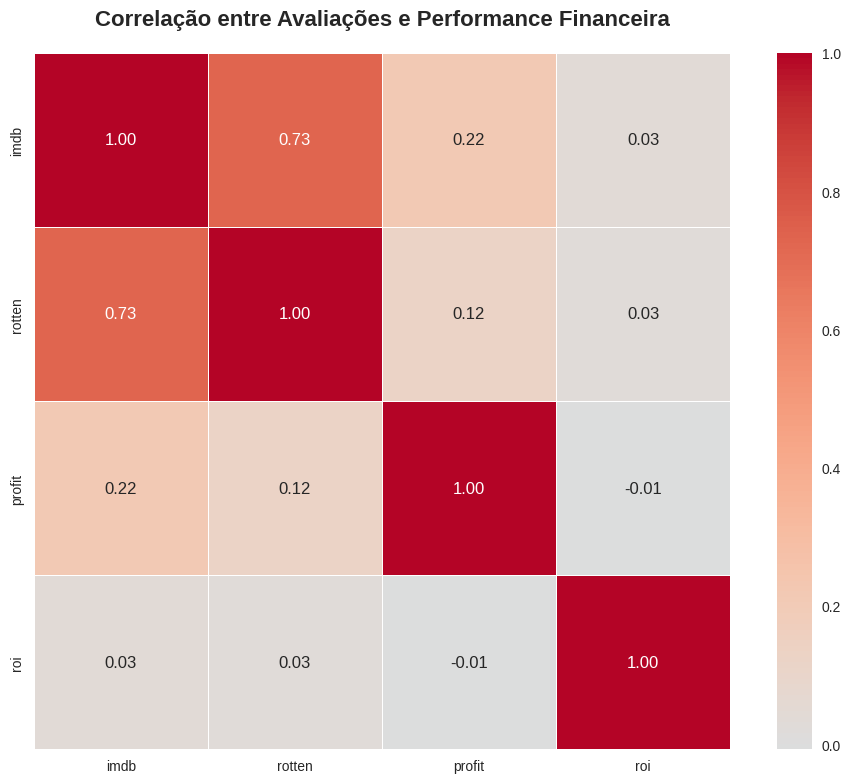


Correlações encontradas:
         imdb  rotten  profit    roi
imdb    1.000   0.727   0.216  0.034
rotten  0.727   1.000   0.121  0.029
profit  0.216   0.121   1.000 -0.008
roi     0.034   0.029  -0.008  1.000


In [35]:
# Análise de avaliações de qualidade
quality_metrics = ['imdb', 'rotten', 'Metacritic']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Avaliações de Qualidade por Cluster', fontsize=18, fontweight='bold', y=1.02)

for i, metric in enumerate(quality_metrics):
    if metric in df.columns:
        # Boxplot
        sns.boxplot(data=df, x='cluster', y=metric, ax=axes[i], palette='Set3')
        axes[i].set_title(f'{metric.upper()} por Cluster', fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', alpha=0.3)
        
        # Adicionar médias
        means = df.groupby('cluster')[metric].mean()
        for j, (cluster, mean_val) in enumerate(means.items()):
            if not pd.isna(mean_val):
                axes[i].text(j, mean_val, f'{mean_val:.1f}', 
                            ha='center', va='bottom', fontweight='bold', 
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('cluster_graphs/03_quality_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlação entre avaliações e performance financeira
correlation_metrics = ['imdb', 'rotten', 'profit', 'roi']
correlation_data = df[correlation_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlação entre Avaliações e Performance Financeira', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('cluster_graphs/04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelações encontradas:")
print(correlation_data.round(3))

## 4. 🎯 Taxas de Sucesso por Cluster

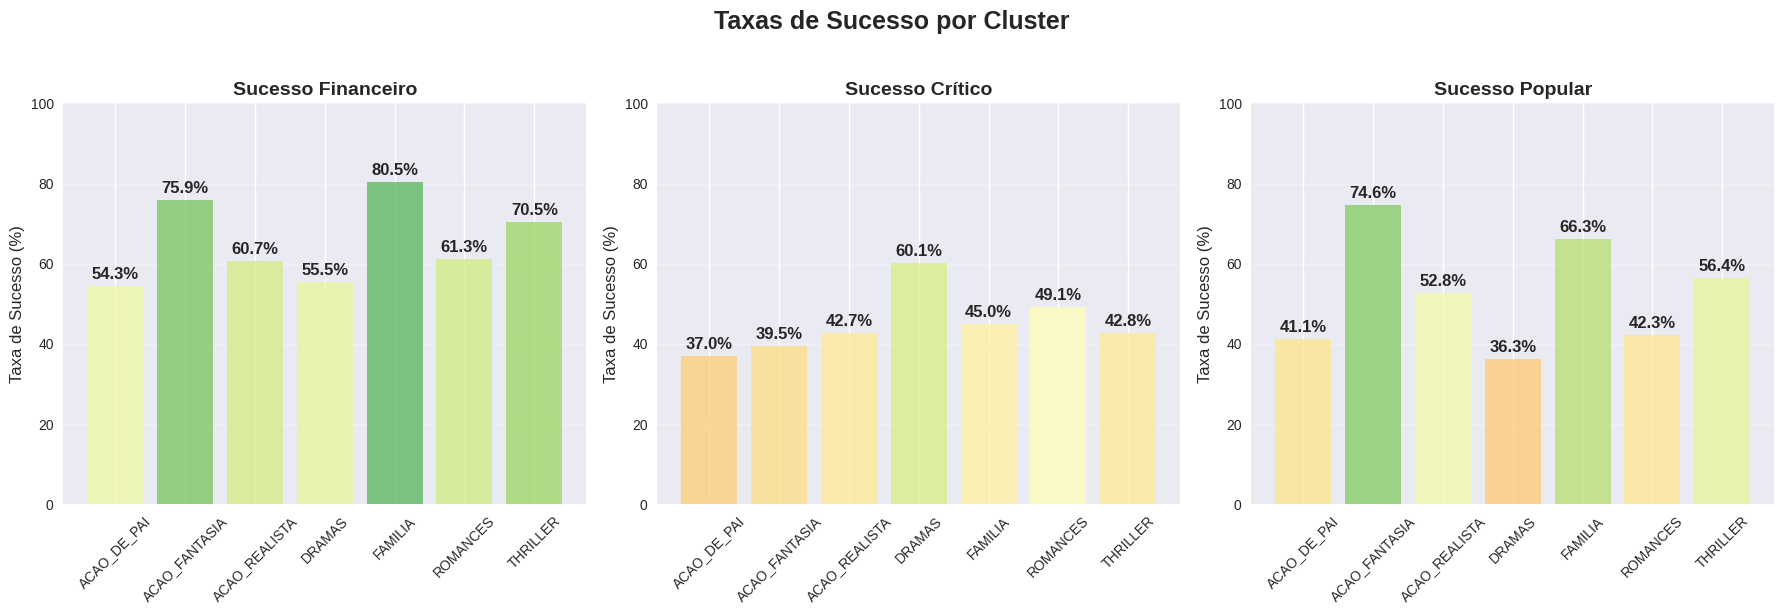


Taxa de Sucesso por Cluster (%):
               financial_success  critical_success  popular_success
cluster                                                            
ACAO_DE_PAI                 54.3              37.0             41.1
ACAO_FANTASIA               75.9              39.5             74.6
ACAO_REALISTA               60.7              42.7             52.8
DRAMAS                      55.5              60.1             36.3
FAMILIA                     80.5              45.0             66.3
ROMANCES                    61.3              49.1             42.3
THRILLER                    70.5              42.8             56.4


In [36]:
# Definir critérios de sucesso
df['financial_success'] = df['profit'] > 0
df['critical_success'] = (df['imdb'] > 7.0) & (df['rotten'] > 70)
df['popular_success'] = df['popularity'] > df['popularity'].median()

# Calcular taxas de sucesso
success_metrics = ['financial_success', 'critical_success', 'popular_success']
success_summary = df.groupby('cluster')[success_metrics].mean() * 100

# Criar gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Taxas de Sucesso por Cluster', fontsize=18, fontweight='bold', y=1.02)

for i, metric in enumerate(success_metrics):
    success_rate = success_summary[metric]
    
    # Criar gradiente de cores baseado na taxa de sucesso
    colors = plt.cm.RdYlGn(success_rate / 100)
    bars = axes[i].bar(success_rate.index, success_rate.values, color=colors, alpha=0.8)
    
    title_map = {
        'financial_success': 'Sucesso Financeiro',
        'critical_success': 'Sucesso Crítico',
        'popular_success': 'Sucesso Popular'
    }
    
    axes[i].set_title(f'{title_map[metric]}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Taxa de Sucesso (%)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].set_ylim(0, 100)
    
    # Adicionar valores nas barras
    for bar, rate in zip(bars, success_rate.values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                     f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('cluster_graphs/05_success_rates.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTaxa de Sucesso por Cluster (%):")
print(success_summary.round(1))

## 5. 📊 Análise de Dispersão: Orçamento vs Receita

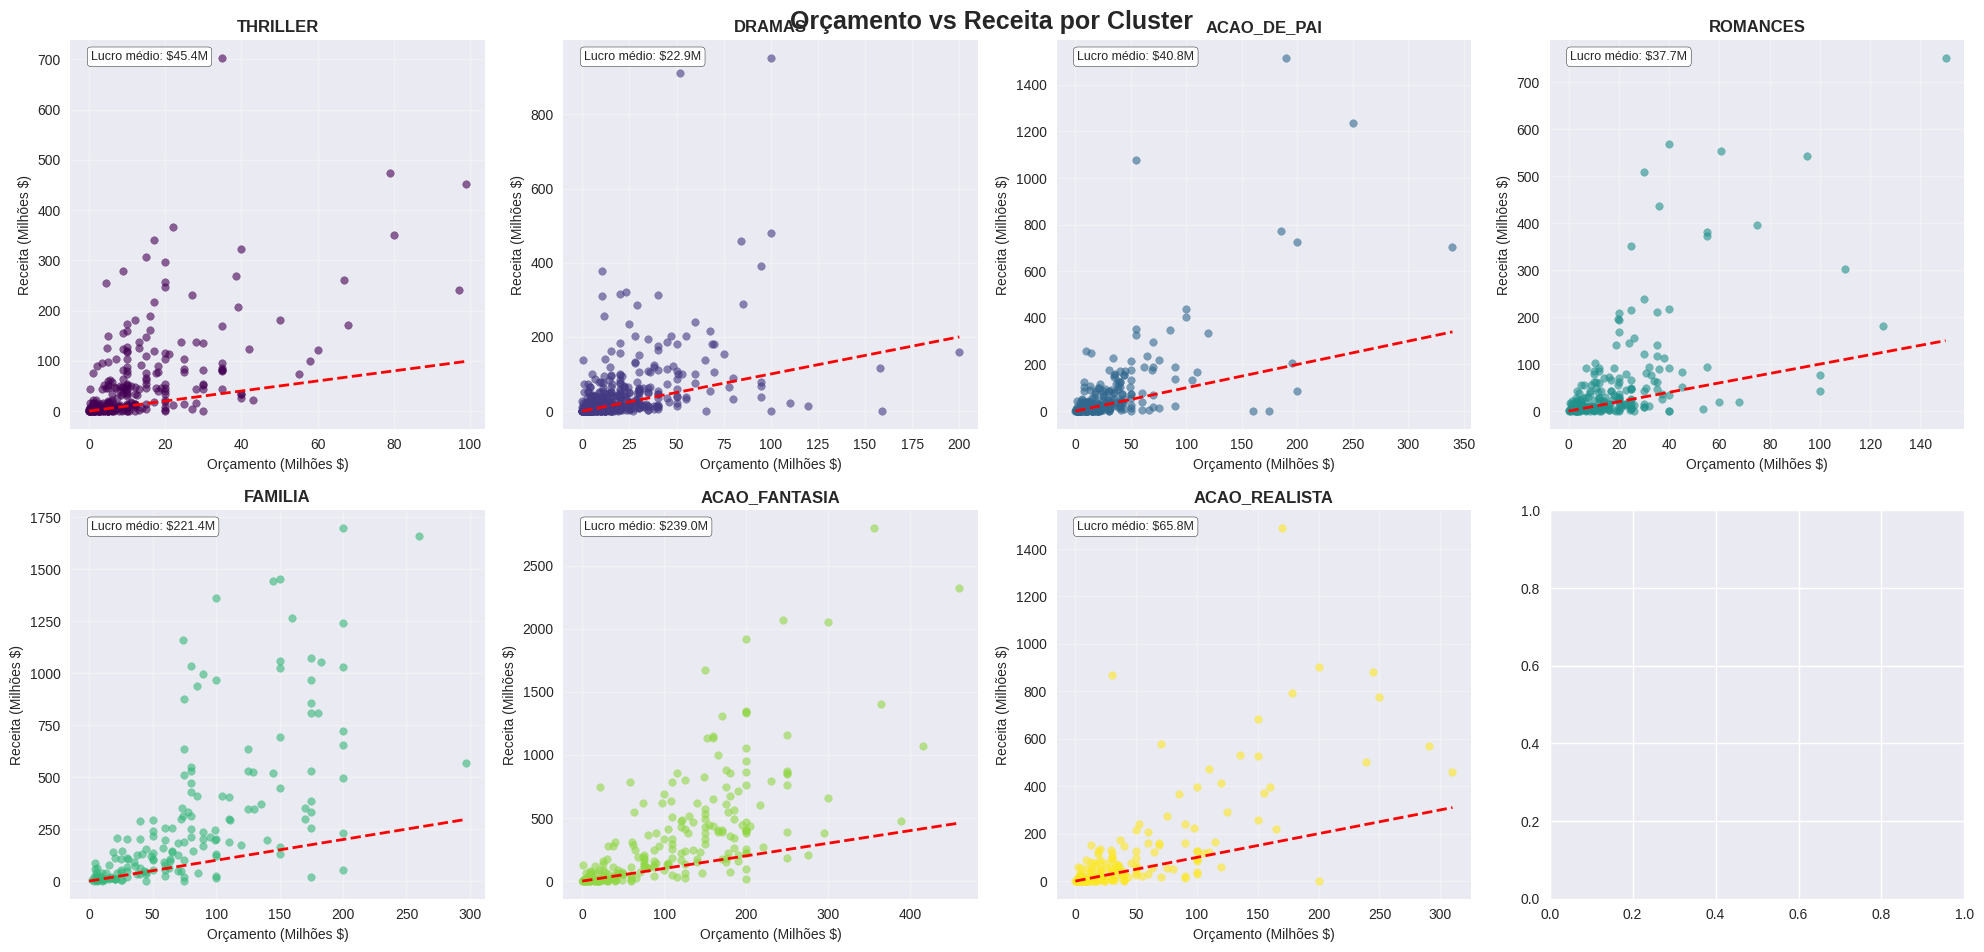

In [37]:
# Análise de dispersão por cluster
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Orçamento vs Receita por Cluster', fontsize=18, fontweight='bold', y=0.95)
axes = axes.ravel()

colors = plt.cm.viridis(np.linspace(0, 1, len(df['cluster'].unique())))

for i, cluster in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    
    # Filtrar dados válidos
    valid_data = cluster_data.dropna(subset=['budget', 'revenue'])
    valid_data = valid_data[(valid_data['budget'] > 0) & (valid_data['revenue'] > 0)]
    
    if len(valid_data) > 0:
        budgets = valid_data['budget'] / 1e6
        revenues = valid_data['revenue'] / 1e6
        
        axes[i].scatter(budgets, revenues, alpha=0.6, s=30, color=colors[i])
        axes[i].set_xlabel('Orçamento (Milhões $)', fontsize=10)
        axes[i].set_ylabel('Receita (Milhões $)', fontsize=10)
        axes[i].set_title(f'{cluster}', fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # Linha de break-even
        max_budget = budgets.max() if len(budgets) > 0 else 100
        axes[i].plot([0, max_budget], [0, max_budget], 'r--', alpha=1, linewidth=2)
        
        # Adicionar estatísticas
        avg_profit = (revenues - budgets).mean()
        axes[i].text(0.05, 0.95, f'Lucro médio: ${avg_profit:.1f}M', 
                    transform=axes[i].transAxes, fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=1))
    else:
        axes[i].text(0.5, 0.5, 'Sem dados', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(f'{cluster}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('cluster_graphs/06_budget_vs_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. 📈 Evolução Temporal dos Clusters

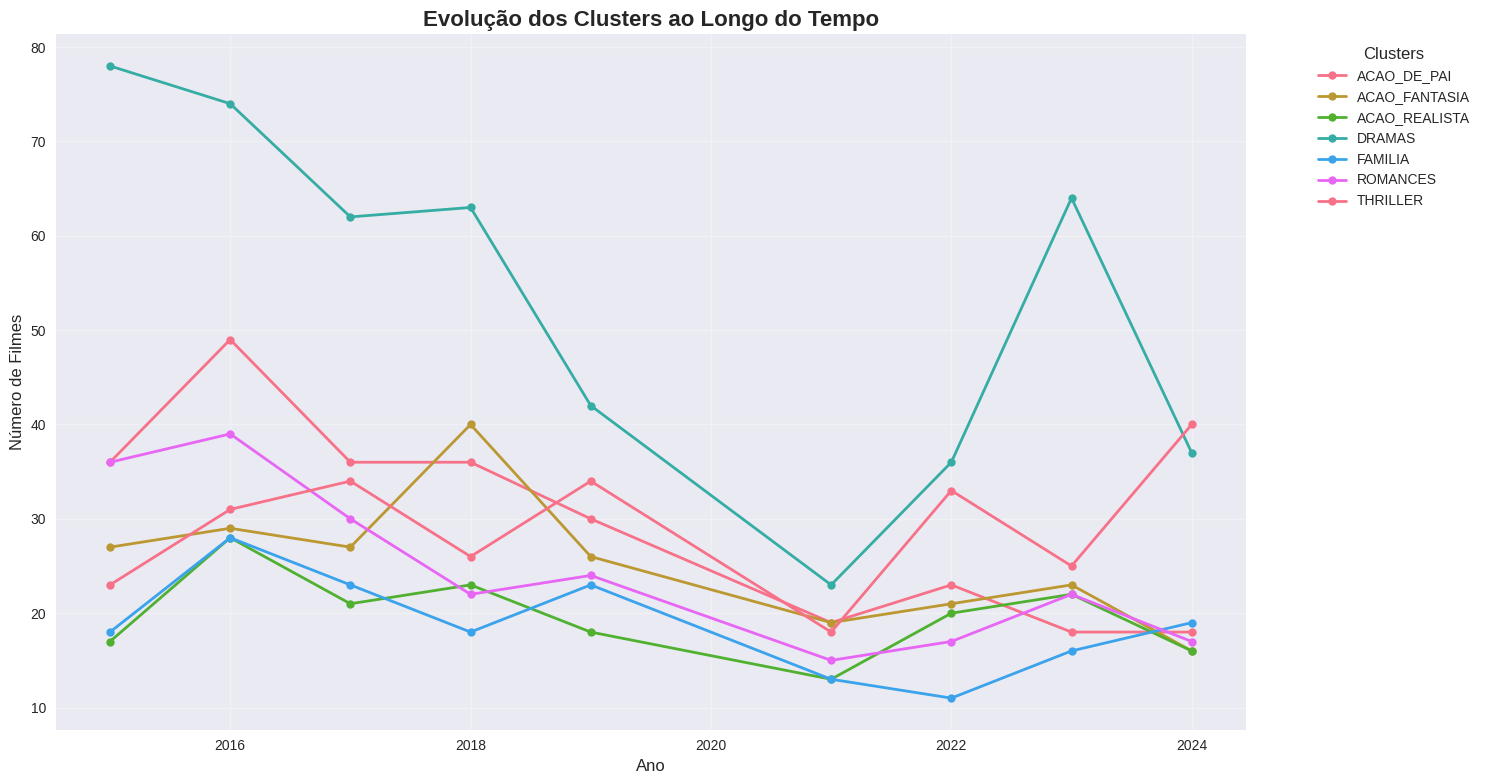

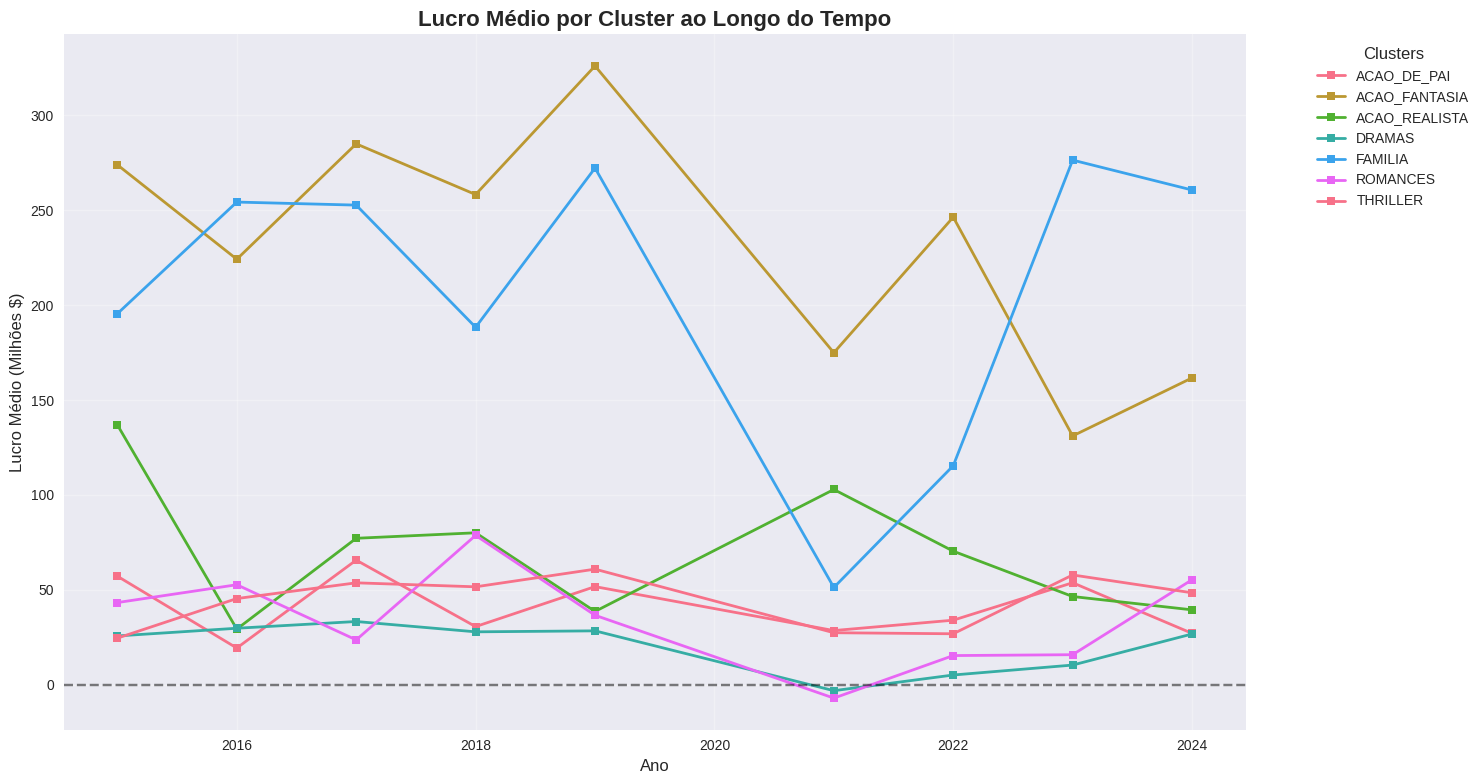

In [38]:
# Análise temporal
yearly_distribution = df.groupby(['Year', 'cluster']).size().unstack(fill_value=0)

# Gráfico de evolução temporal
plt.figure(figsize=(15, 8))
for cluster in yearly_distribution.columns:
    plt.plot(yearly_distribution.index, yearly_distribution[cluster], 
             marker='o', linewidth=2, markersize=6, label=cluster)

plt.title('Evolução dos Clusters ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_graphs/07_temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Performance financeira por ano
yearly_performance = df.groupby(['Year', 'cluster'])['profit'].mean().unstack()

plt.figure(figsize=(15, 8))
for cluster in yearly_performance.columns:
    plt.plot(yearly_performance.index, yearly_performance[cluster] / 1e6, 
             marker='s', linewidth=2, markersize=6, label=cluster)

plt.title('Lucro Médio por Cluster ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Lucro Médio (Milhões $)', fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('cluster_graphs/08_temporal_performance.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. 🎬 Top Performers por Cluster

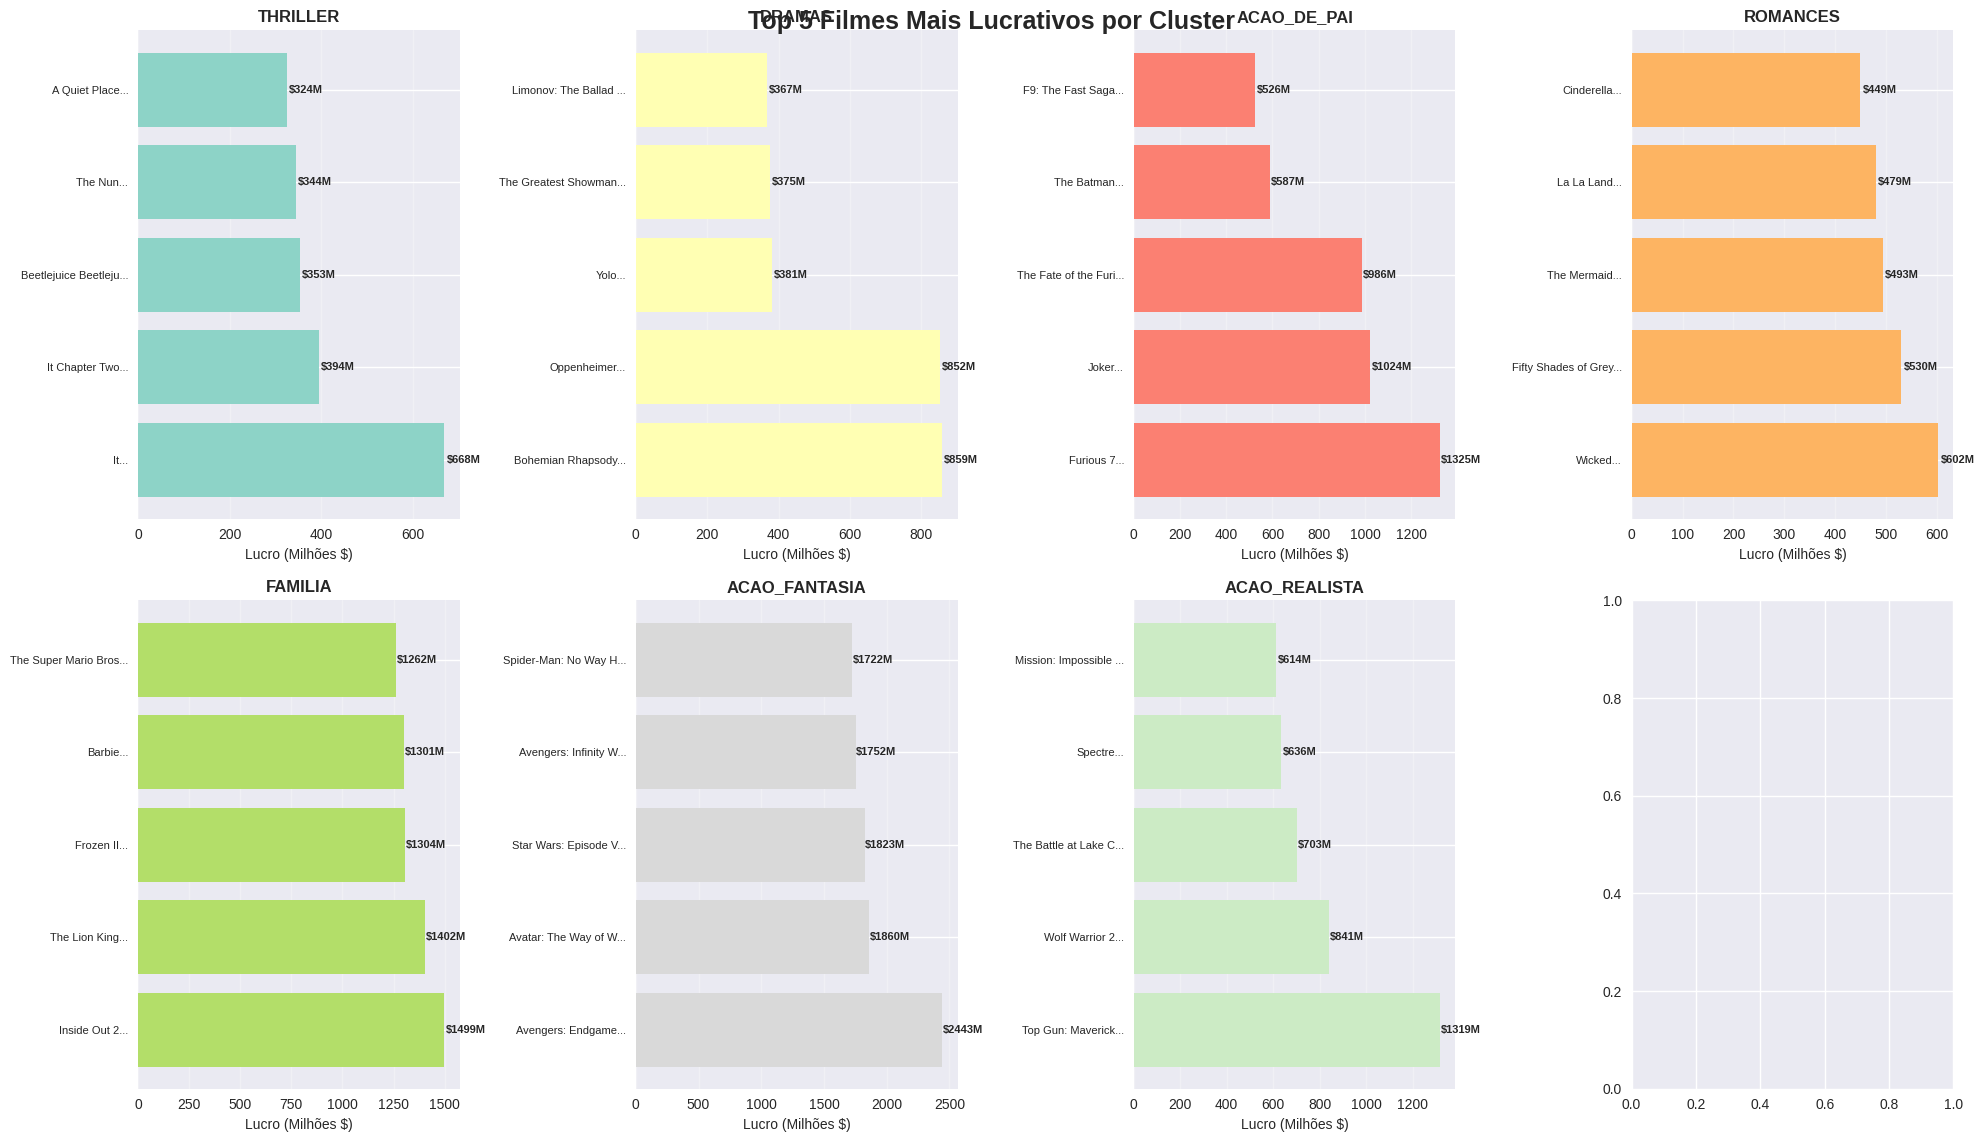


Top 5 Filmes Mais Lucrativos por Cluster:

THRILLER:
  It (2017) - $668.0M (IMDB: 73.0)
  It Chapter Two (2019) - $394.1M (IMDB: 65.0)
  Beetlejuice Beetlejuice (2024) - $352.9M (IMDB: 67.0)
  The Nun (2018) - $344.1M (IMDB: 54.0)
  A Quiet Place (2018) - $324.0M (IMDB: 75.0)

DRAMAS:
  Bohemian Rhapsody (2018) - $858.8M (IMDB: 79.0)
  Oppenheimer (2023) - $852.0M (IMDB: 83.0)
  Yolo (2024) - $380.6M (IMDB: 69.0)
  The Greatest Showman (2017) - $375.1M (IMDB: 75.0)
  Limonov: The Ballad of Eddie (2024) - $367.0M (IMDB: 60.0)

ACAO_DE_PAI:
  Furious 7 (2015) - $1325.4M (IMDB: 71.0)
  Joker (2019) - $1024.0M (IMDB: 83.0)
  The Fate of the Furious (2017) - $986.0M (IMDB: 66.0)
  The Batman (2022) - $587.3M (IMDB: 78.0)
  F9: The Fast Saga (2021) - $526.2M (IMDB: 52.0)

ROMANCES:
  Wicked (2024) - $601.7M (IMDB: 75.0)
  Fifty Shades of Grey (2015) - $529.7M (IMDB: 42.0)
  The Mermaid (2016) - $493.1M (IMDB: 62.0)
  La La Land (2016) - $479.2M (IMDB: 80.0)
  Cinderella (2015) - $448.5M (IM

In [39]:
# Identificar top performers por cluster
def get_top_performers(df, cluster, metric='profit', n=5):
    cluster_data = df[df['cluster'] == cluster].copy()
    cluster_data = cluster_data.dropna(subset=[metric])
    
    if metric == 'profit':
        cluster_data = cluster_data[cluster_data['budget'] > 0]
        cluster_data['profit'] = cluster_data['revenue'] - cluster_data['budget']
    
    return cluster_data.nlargest(n, metric)[['Title', 'Year', metric, 'imdb']]

# Criar gráfico dos top performers
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Top 5 Filmes Mais Lucrativos por Cluster', fontsize=18, fontweight='bold', y=0.95)
axes = axes.ravel()

for i, cluster in enumerate(df['cluster'].unique()):
    top_films = get_top_performers(df, cluster, 'profit', 5)
    
    if len(top_films) > 0:
        profits = top_films['profit'] / 1e6
        titles = top_films['Title'].str[:20] + '...'  # Truncar títulos longos
        
        bars = axes[i].barh(range(len(profits)), profits, color=plt.cm.Set3(i/len(df['cluster'].unique())))
        axes[i].set_yticks(range(len(profits)))
        axes[i].set_yticklabels(titles, fontsize=8)
        axes[i].set_xlabel('Lucro (Milhões $)', fontsize=10)
        axes[i].set_title(f'{cluster}', fontsize=12, fontweight='bold')
        axes[i].grid(axis='x', alpha=0.3)
        
        # Adicionar valores nas barras
        for j, (bar, profit) in enumerate(zip(bars, profits)):
            axes[i].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                         f'${profit:.0f}M', ha='left', va='center', fontsize=8, fontweight='bold')
    else:
        axes[i].text(0.5, 0.5, 'Sem dados', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(f'{cluster}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('cluster_graphs/09_top_performers.png', dpi=300, bbox_inches='tight')
plt.show()

# Mostrar top performers em tabela
print("\nTop 5 Filmes Mais Lucrativos por Cluster:")
for cluster in df['cluster'].unique():
    top_films = get_top_performers(df, cluster, 'profit', 5)
    if len(top_films) > 0:
        print(f"\n{cluster}:")
        for idx, row in top_films.iterrows():
            profit_millions = row['profit'] / 1e6
            imdb_rating = f"{row['imdb']:.1f}" if not pd.isna(row['imdb']) else "N/A"
            print(f"  {row['Title']} ({row['Year']}) - ${profit_millions:.1f}M (IMDB: {imdb_rating})")

## 8. 📋 Resumo Executivo Visual

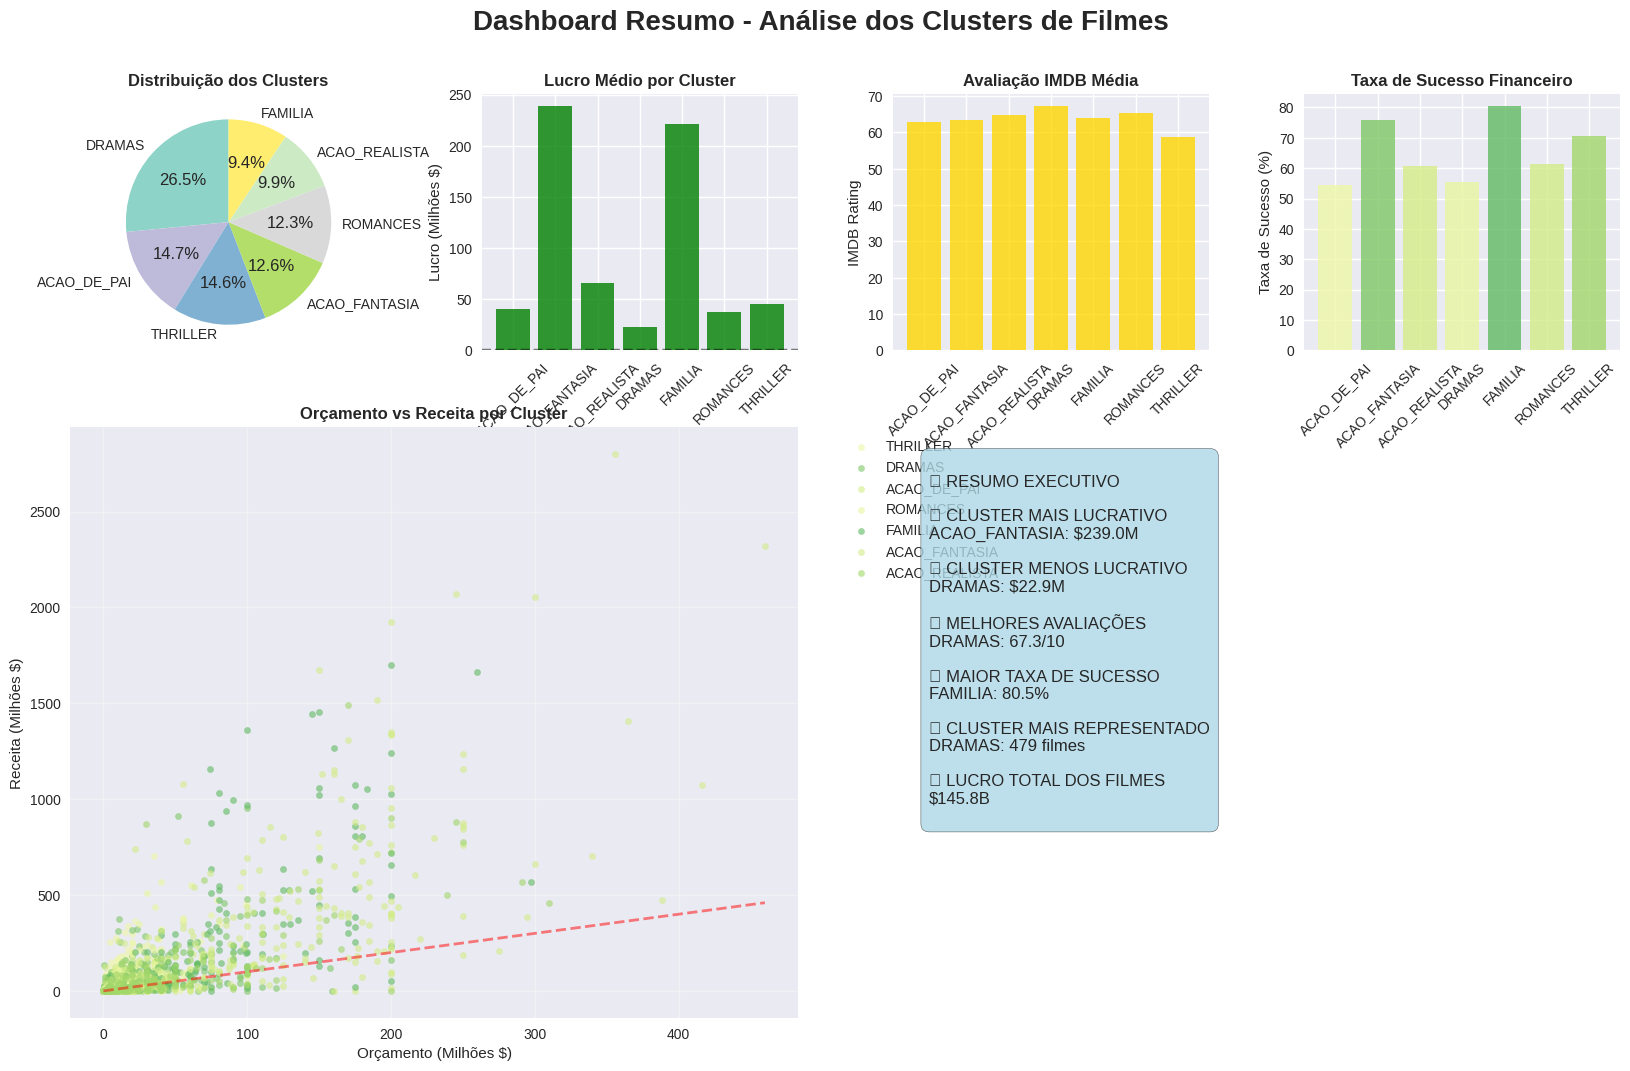


🎉 ANÁLISE VISUAL CONCLUÍDA!
📁 Gráficos salvos na pasta 'cluster_graphs/'
📊 Total de 1805 filmes analisados
🎬 7 clusters identificados


In [40]:
# Criar dashboard resumo
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Dashboard Resumo - Análise dos Clusters de Filmes', fontsize=20, fontweight='bold', y=0.95)

# Layout do dashboard
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Distribuição dos clusters (pizza)
ax1 = fig.add_subplot(gs[0, 0])
cluster_counts = df['cluster'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_counts)))
wedges, texts, autotexts = ax1.pie(cluster_counts.values, labels=cluster_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Distribuição dos Clusters', fontweight='bold')

# 2. Lucro médio por cluster
ax2 = fig.add_subplot(gs[0, 1])
profit_means = df.groupby('cluster')['profit'].mean() / 1e6
colors = ['red' if x < 0 else 'green' for x in profit_means.values]
bars = ax2.bar(profit_means.index, profit_means.values, color=colors, alpha=0.8)
ax2.set_title('Lucro Médio por Cluster', fontweight='bold')
ax2.set_ylabel('Lucro (Milhões $)')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 3. Avaliação IMDB média
ax3 = fig.add_subplot(gs[0, 2])
imdb_means = df.groupby('cluster')['imdb'].mean()
bars = ax3.bar(imdb_means.index, imdb_means.values, color='gold', alpha=0.8)
ax3.set_title('Avaliação IMDB Média', fontweight='bold')
ax3.set_ylabel('IMDB Rating')
ax3.tick_params(axis='x', rotation=45)

# 4. Taxa de sucesso financeiro
ax4 = fig.add_subplot(gs[0, 3])
success_rate = df.groupby('cluster')['financial_success'].mean() * 100
colors = plt.cm.RdYlGn(success_rate / 100)
bars = ax4.bar(success_rate.index, success_rate.values, color=colors, alpha=0.8)
ax4.set_title('Taxa de Sucesso Financeiro', fontweight='bold')
ax4.set_ylabel('Taxa de Sucesso (%)')
ax4.tick_params(axis='x', rotation=45)

# 5. Orçamento vs Receita (scatter)
ax5 = fig.add_subplot(gs[1:, :2])
for i, cluster in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    valid_data = cluster_data.dropna(subset=['budget', 'revenue'])
    valid_data = valid_data[(valid_data['budget'] > 0) & (valid_data['revenue'] > 0)]
    
    if len(valid_data) > 0:
        budgets = valid_data['budget'] / 1e6
        revenues = valid_data['revenue'] / 1e6
        ax5.scatter(budgets, revenues, alpha=0.6, s=20, label=cluster, color=colors[i])

ax5.set_xlabel('Orçamento (Milhões $)')
ax5.set_ylabel('Receita (Milhões $)')
ax5.set_title('Orçamento vs Receita por Cluster', fontweight='bold')
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(True, alpha=0.3)

# Linha de break-even
max_budget = df['budget'].max() / 1e6 if df['budget'].max() > 0 else 100
ax5.plot([0, max_budget], [0, max_budget], 'r--', alpha=0.5, linewidth=2)

# 6. Estatísticas resumo
ax6 = fig.add_subplot(gs[1:, 2:])
ax6.axis('off')

# Calcular estatísticas
most_profitable = profit_means.idxmax()
least_profitable = profit_means.idxmin()
best_rated = imdb_means.idxmax()
most_successful = success_rate.idxmax()
largest_cluster = cluster_counts.idxmax()

summary_text = f'''
📊 RESUMO EXECUTIVO

🎯 CLUSTER MAIS LUCRATIVO
{most_profitable}: ${profit_means[most_profitable]:.1f}M

📉 CLUSTER MENOS LUCRATIVO
{least_profitable}: ${profit_means[least_profitable]:.1f}M

⭐ MELHORES AVALIAÇÕES
{best_rated}: {imdb_means[best_rated]:.1f}/10

✅ MAIOR TAXA DE SUCESSO
{most_successful}: {success_rate[most_successful]:.1f}%

📈 CLUSTER MAIS REPRESENTADO
{largest_cluster}: {cluster_counts[largest_cluster]} filmes

💰 LUCRO TOTAL DOS FILMES
${df['profit'].sum()/1e9:.1f}B
'''

ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
         facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('cluster_graphs/10_dashboard_resumo.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("🎉 ANÁLISE VISUAL CONCLUÍDA!")
print("="*80)
print(f"📁 Gráficos salvos na pasta 'cluster_graphs/'")
print(f"📊 Total de {len(df)} filmes analisados")
print(f"🎬 {len(df['cluster'].unique())} clusters identificados")
print("="*80)